# Rendimientos CC&O

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import networkx as nx
from pyvis.network import Network

import plotly.graph_objects as go

ModuleNotFoundError: No module named 'networkx'

In [3]:
# leer archivo .pkl
data = pd.read_pickle('data/data.pkl')

# Filtrar por la columna 'Area'
data = data[data['Proceso'] == 'Control de calidad y Optimizacion de Producto']

In [4]:
# Definir mes de analisis
mes = "20238"

# Filtra el DataFrame para seleccionar las filas con Ciclo igual a mes
data_informe = data[data['Ciclo'] == mes]

## Análisis descriptivo

### Comparacion ciclos
Se muestra el total de horas consumidas historico.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


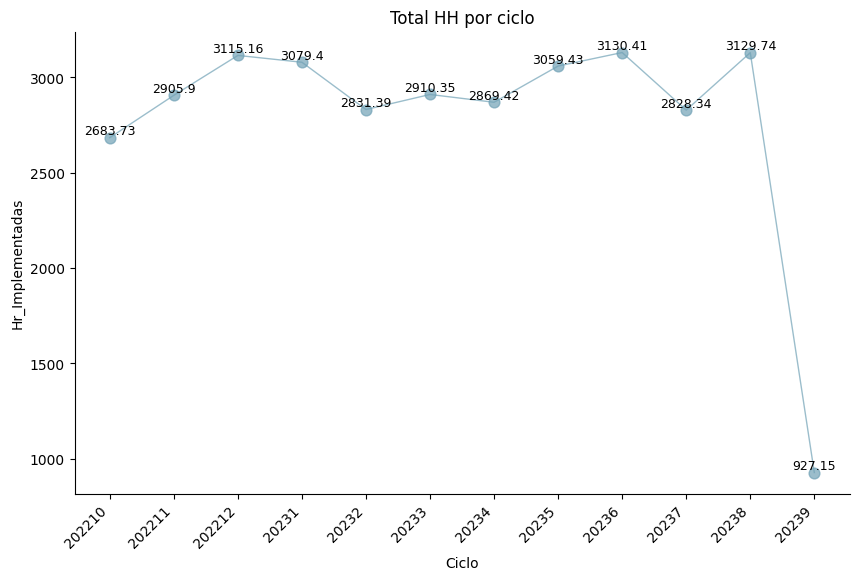

In [5]:
# Selecciona las columnas Ciclo y Hr_Implementadas
data_selected = data[['Ciclo', 'Hr_Implementadas']]

# Agrupa por Ciclo y calcula la suma de Hr_Implementadas
data_summarized = data_selected.groupby('Ciclo').sum().reset_index()

# Visualización con matplotlib
plt.figure(figsize=(10, 6))

plt.plot(data_summarized['Ciclo'], data_summarized['Hr_Implementadas'], color="#71A2B6", linewidth=1, alpha=0.7)
plt.scatter(data_summarized['Ciclo'], data_summarized['Hr_Implementadas'], color="#71A2B6", s=60, alpha=0.7)
for i, row in data_summarized.iterrows():
    plt.text(row['Ciclo'], row['Hr_Implementadas'], str(row['Hr_Implementadas']), va='bottom', ha='center', fontsize=9)

plt.xlabel('Ciclo')
plt.ylabel('Hr_Implementadas')
plt.title('Total HH por ciclo')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend().set_visible(False)
plt.show()

Se muestra el total histórico de colaboradores con registro de actividades.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


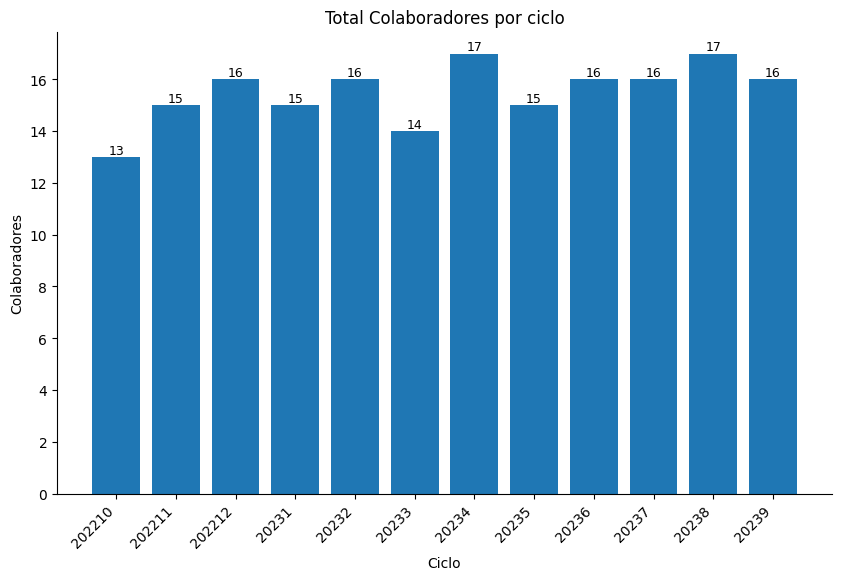

In [6]:
# Selecciona las columnas Ciclo y Colaborador y elimina duplicados
data_selected = data[['Ciclo', 'Colaborador']].drop_duplicates()

# Agrupa por Ciclo y cuenta el número de colaboradores
data_grouped = data_selected.groupby('Ciclo')['Colaborador'].count().reset_index()

# Visualización con matplotlib
plt.figure(figsize=(10, 6))

plt.bar(data_grouped['Ciclo'], data_grouped['Colaborador'])
for i, row in data_grouped.iterrows():
    plt.text(row['Ciclo'], row['Colaborador'], str(row['Colaborador']), va='bottom', ha='center', fontsize=9)

plt.xlabel('Ciclo')
plt.ylabel('Colaboradores')
plt.title('Total Colaboradores por ciclo')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend().set_visible(False)
plt.show()

### Vertical

Total horas por vertical

In [7]:
# Realizar las operaciones de manipulación de datos
data_processed = data_informe.groupby('Vertical')['Hr_Implementadas'].sum().reset_index()
data_processed['Hr_Implementadas'] = data_processed['Hr_Implementadas'].round()
data_processed = data_processed.sort_values(by='Hr_Implementadas', ascending=False)
data_processed['Porcentaje'] = ((data_processed['Hr_Implementadas'] / data_processed['Hr_Implementadas'].sum()) * 100).round(2)
data_processed['Porcentaje_Acumulado'] = data_processed['Porcentaje'].cumsum()

data_processed

,Vertical,Hr_Implementadas,Porcentaje,Porcentaje_Acumulado
5,Implementacion,1330.0,42.49,42.49
8,Monitoreo y Reporting,1000.0,31.95,74.44
18,Vertebra Help,596.0,19.04,93.48
14,Spine,204.0,6.52,100.00
11,Proyectos especiales,0.0,0.00,100.00
17,VT Sr,0.0,0.00,100.00
16,VPM,0.0,0.00,100.00
15,Talento Humano,0.0,0.00,100.00
13,Soluciones técnicas,0.0,0.00,100.00
12,Soluciones Técnicas,0.0,0.00,100.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


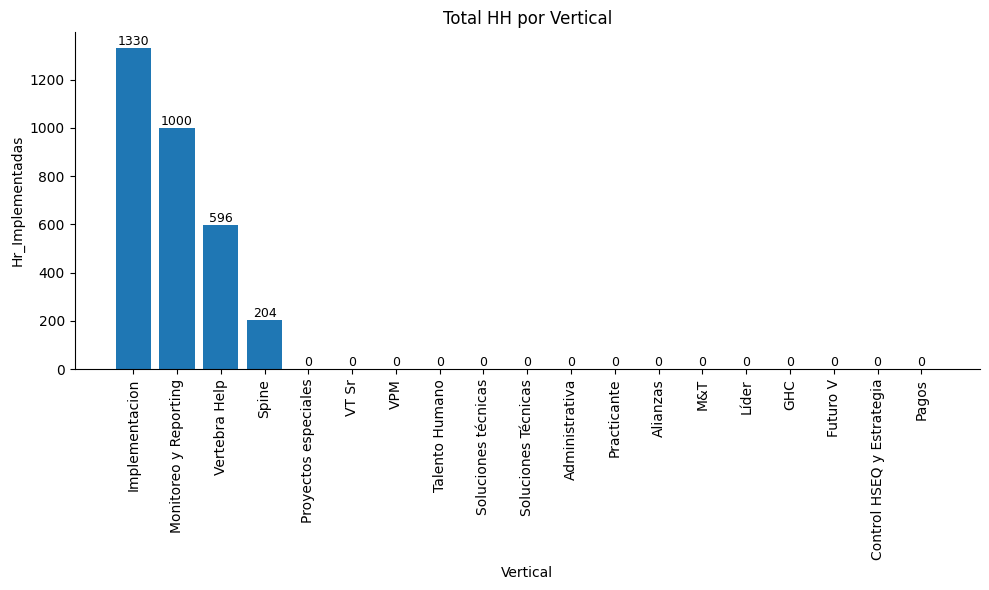

In [8]:
# Visualización con matplotlib
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
bars = plt.bar(data_processed['Vertical'], data_processed['Hr_Implementadas'])

# Agregar etiquetas de datos a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=9)

plt.xlabel('Vertical')
plt.ylabel('Hr_Implementadas')
plt.title('Total HH por Vertical')
plt.xticks(rotation=90, ha='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend().set_visible(False)
plt.tight_layout()  # Ajustar el diseño
plt.show()

### Contratos
Total HH  por contrato

In [9]:
# Realizar las operaciones de manipulación de datos
data_processed = data_informe.groupby('Contrato')['Hr_Implementadas'].sum().reset_index()
data_processed['Hr_Implementadas'] = data_processed['Hr_Implementadas'].round()
data_processed = data_processed.sort_values(by='Hr_Implementadas', ascending=False)
data_processed['Porcentaje'] = ((data_processed['Hr_Implementadas'] / data_processed['Hr_Implementadas'].sum()) * 100).round(2)
data_processed['Porcentaje_Acumulado'] = data_processed['Porcentaje'].cumsum()

# Filtrar las filas con Hr_Implementadas != 0
data_processed = data_processed[data_processed['Hr_Implementadas'] != 0]

data_processed

,Contrato,Hr_Implementadas,Porcentaje,Porcentaje_Acumulado
47,Vertebra - N/A.,1008.0,32.23,32.23
16,Davivienda - Pagos,488.0,15.60,47.83
15,Davivienda - Ecoeficiencia,412.0,13.17,61.00
20,Farmatodo - Ecoeficiencia,148.0,4.73,65.73
39,Mesofoods - Ecoeficiencia,141.0,4.51,70.24
7,BBVA - Ecoeficiencia,120.0,3.84,74.08
27,KFC - Ecoeficiencia,108.0,3.45,77.53
17,Dollarcity - Ecoeficiencia,106.0,3.39,80.92
9,Bancoomeva - Ecoeficiencia,92.0,2.94,83.86
45,Synlab - Pagos,90.0,2.88,86.74


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


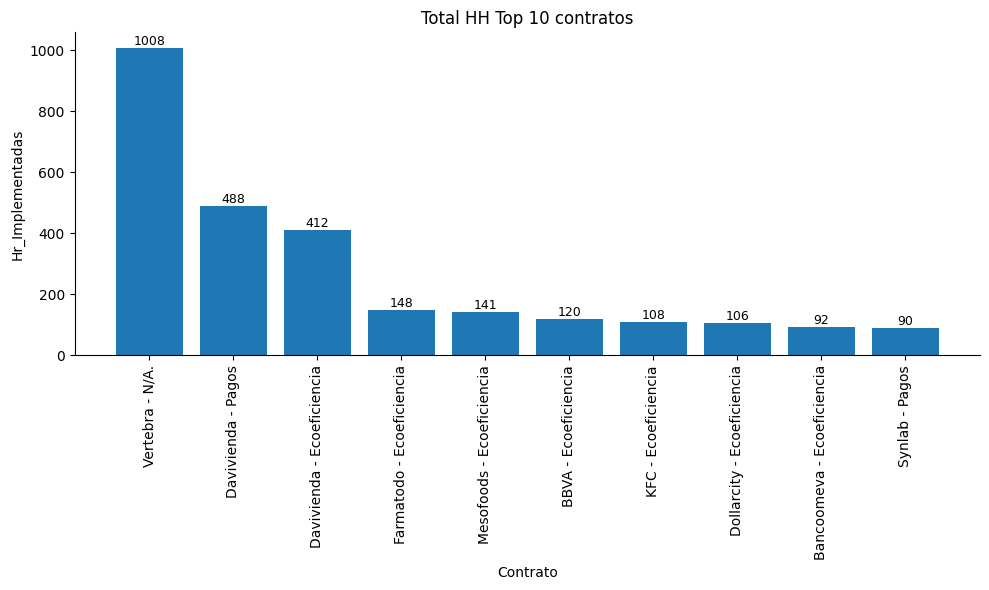

In [10]:
# Visualización con matplotlib
plt.figure(figsize=(10, 6))

# Seleccionar y mostrar el top 10
top_10 = data_processed.nlargest(10, 'Hr_Implementadas')

# Crear el gráfico de barras
bars = plt.bar(top_10['Contrato'], top_10['Hr_Implementadas'])

# Agregar etiquetas de datos a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=9)

plt.xlabel('Contrato')
plt.ylabel('Hr_Implementadas')
plt.title('Total HH Top 10 contratos')
plt.xticks(rotation=90, ha='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend().set_visible(False)
plt.tight_layout()  # Ajustar el diseño
plt.show()

Horas por contrato por día

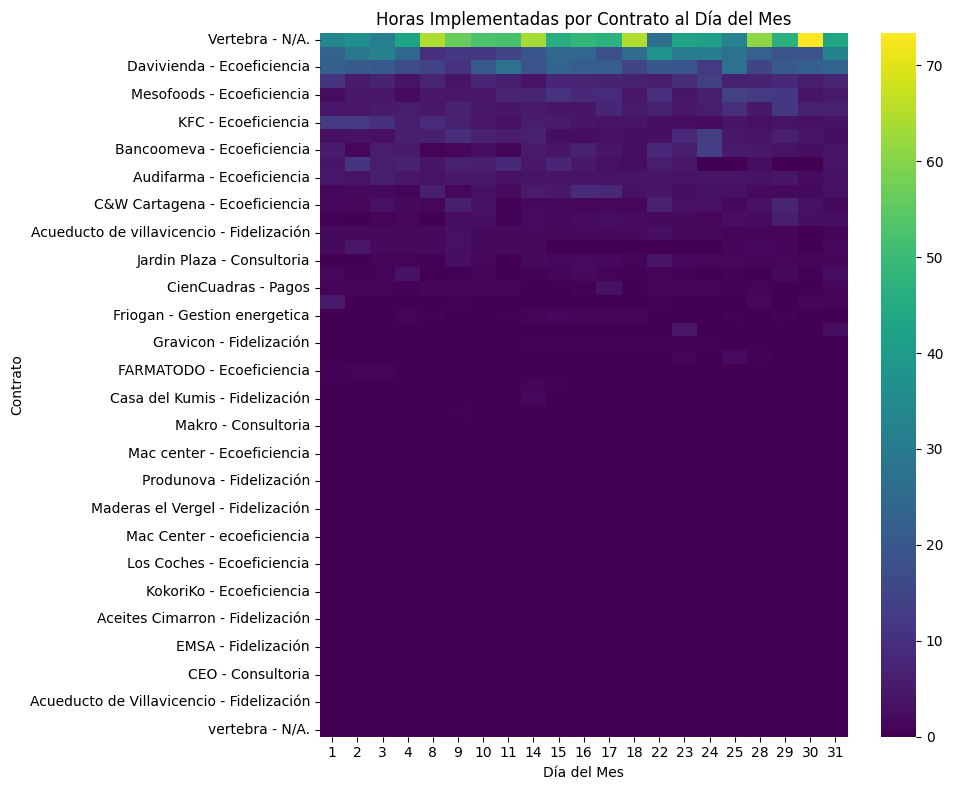

In [11]:
# Asegurarnos de que la columna "Fecha" sea de tipo datetime
data_informe['Fecha'] = pd.to_datetime(data_informe['Fecha'])

# Preprocesamiento de los datos para resumir las horas implementadas por contrato y día
data_resumen = data_informe.groupby(['Contrato', 'Fecha'])['Hr_Implementadas'].sum().reset_index()

# Obtener el día del mes a partir de la columna 'Fecha'
data_resumen['Dia del Mes'] = data_resumen['Fecha'].dt.day

# Calcular el total de Hr_Implementadas por contrato
total_hr_contrato = data_resumen.groupby('Contrato')['Hr_Implementadas'].sum()

# Ordenar los contratos de mayor a menor por total de Hr_Implementadas
contratos_ordenados = total_hr_contrato.sort_values(ascending=False).index

# Crear el mapa de calor con seaborn
plt.figure(figsize=(10, 8))

# Pivotear los datos para tener los días del mes en el eje x y los contratos en el eje y
heatmap_data = data_resumen.pivot(index='Contrato', columns='Dia del Mes', values='Hr_Implementadas')

# Reorganizar las filas del DataFrame de acuerdo a los contratos ordenados
heatmap_data = heatmap_data.loc[contratos_ordenados]

sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='s')  # Mostrar valores y formato de cadena
plt.xlabel('Día del Mes')
plt.ylabel('Contrato')
plt.title('Horas Implementadas por Contrato al Día del Mes')
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar el diseño
plt.show()

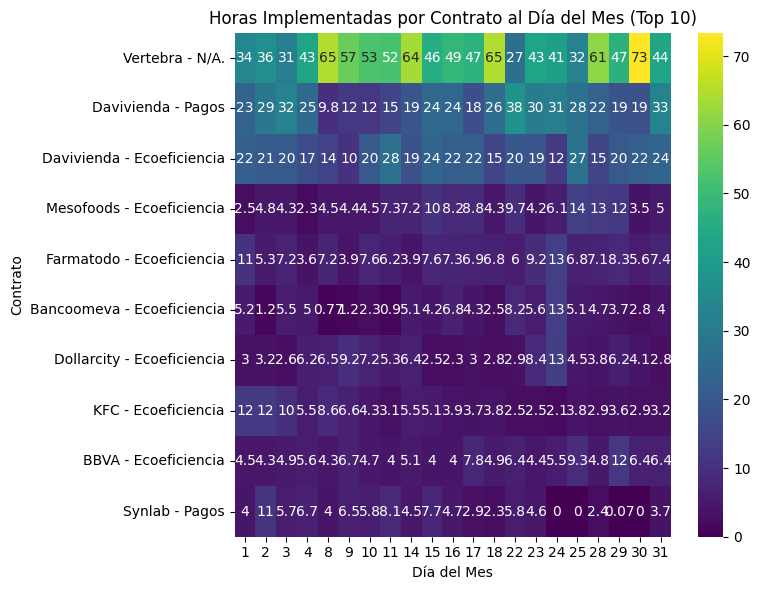

In [12]:
# Asegurarnos de que la columna "Fecha" sea de tipo datetime
data_informe['Fecha'] = pd.to_datetime(data_informe['Fecha'])

# Preprocesamiento de los datos para resumir las horas implementadas por contrato y día
data_resumen = data_informe.groupby(['Contrato', 'Fecha'])['Hr_Implementadas'].sum().reset_index()

# Obtener el día del mes a partir de la columna 'Fecha'
data_resumen['Dia del Mes'] = data_resumen['Fecha'].dt.day

# Calcular el total de Hr_Implementadas por contrato
total_hr_contrato = data_resumen.groupby('Contrato')['Hr_Implementadas'].sum()

# Tomar los 10 primeros contratos de mayor a menor
contratos_top_10 = total_hr_contrato.sort_values(ascending=False).index[:10]

# Filtrar los datos para los 10 primeros contratos
data_resumen_top_10 = data_resumen[data_resumen['Contrato'].isin(contratos_top_10)]

# Ordenar los 10 contratos de mayor a menor por total de Hr_Implementadas
data_resumen_top_10 = data_resumen_top_10[data_resumen_top_10['Contrato'].isin(contratos_top_10)].sort_values(by='Hr_Implementadas', ascending=False)

# Crear el mapa de calor con seaborn
plt.figure(figsize=(8, 6))

# Pivotear los datos para tener los días del mes en el eje x y los contratos en el eje y
heatmap_data = data_resumen_top_10.pivot(index='Contrato', columns='Dia del Mes', values='Hr_Implementadas')

sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # Mostrar valores y formato de cadena
plt.xlabel('Día del Mes')
plt.ylabel('Contrato')
plt.title('Horas Implementadas por Contrato al Día del Mes (Top 10)')
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar el diseño
plt.show()

## Actividad general

In [13]:
# Realizar las operaciones de manipulación de datos
data_processed = data_informe.groupby('Actividad_general')['Hr_Implementadas'].sum().reset_index()
data_processed['Hr_Implementadas'] = data_processed['Hr_Implementadas'].round()
data_processed = data_processed.sort_values(by='Hr_Implementadas', ascending=False)
data_processed['Porcentaje'] = ((data_processed['Hr_Implementadas'] / data_processed['Hr_Implementadas'].sum()) * 100).round(2)
data_processed['Porcentaje_Acumulado'] = data_processed['Porcentaje'].cumsum()

# Filtrar las filas con Hr_Implementadas != 0
data_processed = data_processed[data_processed['Hr_Implementadas'] != 0]

data_processed

,Actividad_general,Hr_Implementadas,Porcentaje,Porcentaje_Acumulado
4,Gestión de procesos,1168.0,37.33,37.33
5,Planeación Estratégica,612.0,19.56,56.89
10,Talento humano y ausentismo,577.0,18.44,75.33
0,Atención al cliente,427.0,13.65,88.98
7,Reporting,280.0,8.95,97.93
3,Estructuración de procesos,63.0,2.01,99.94
9,Talento Humano y ausentismo,2.0,0.06,100.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


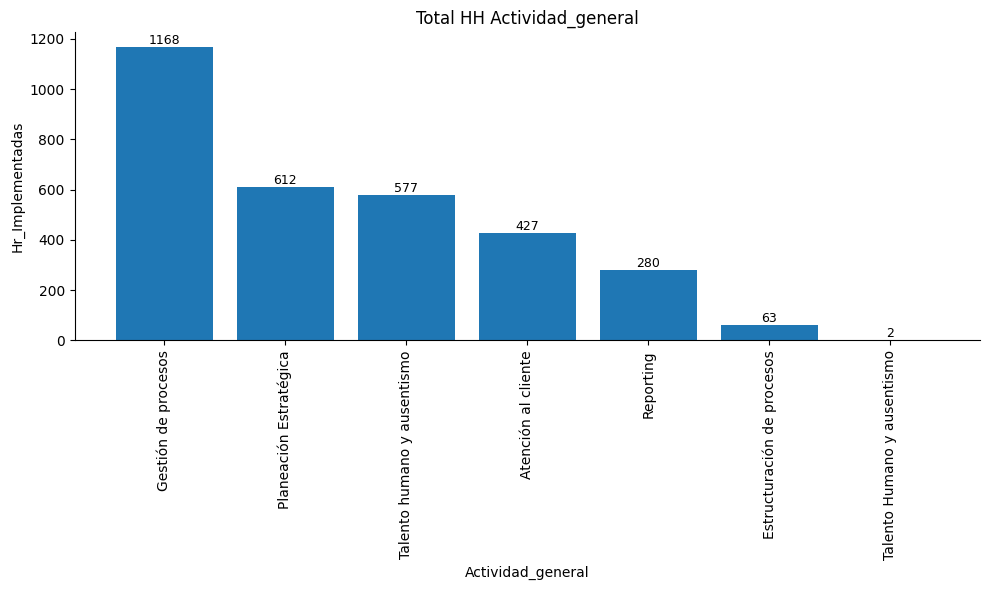

In [14]:
# Visualización con matplotlib
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
bars = plt.bar(data_processed['Actividad_general'], data_processed['Hr_Implementadas'])

# Agregar etiquetas de datos a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=9)

plt.xlabel('Actividad_general')
plt.ylabel('Hr_Implementadas')
plt.title('Total HH Actividad_general')
plt.xticks(rotation=90, ha='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend().set_visible(False)
plt.tight_layout()  # Ajustar el diseño
plt.show()

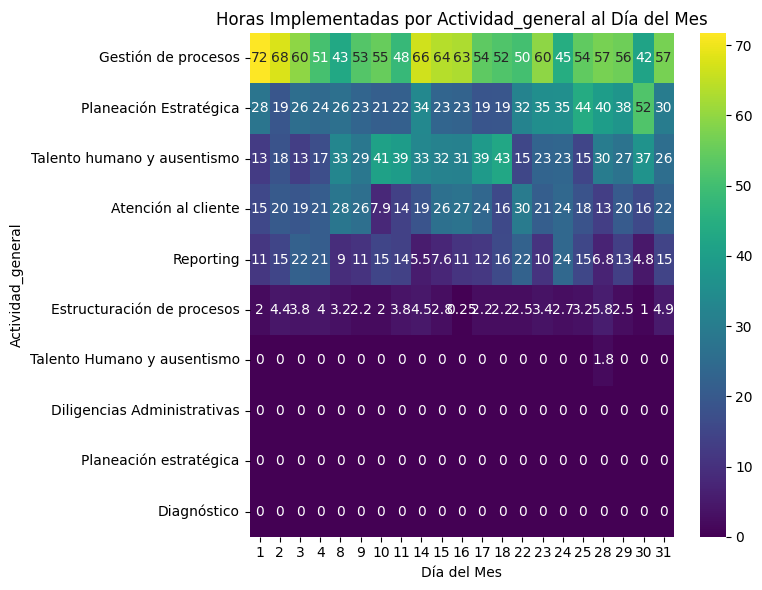

In [15]:
# Asegurarnos de que la columna "Fecha" sea de tipo datetime
data_informe['Fecha'] = pd.to_datetime(data_informe['Fecha'])

# Preprocesamiento de los datos para resumir las horas implementadas
data_resumen = data_informe.groupby(['Actividad_general', 'Fecha'])['Hr_Implementadas'].sum().reset_index()

# Obtener el día del mes a partir de la columna 'Fecha'
data_resumen['Dia del Mes'] = data_resumen['Fecha'].dt.day

# Calcular el total de Hr_Implementadas
total_hr_Actividad_general = data_resumen.groupby('Actividad_general')['Hr_Implementadas'].sum()

# Tomar los 10 primeros
Actividad_general_top_10 = total_hr_Actividad_general.sort_values(ascending=False).index[:10]

# Filtrar los datos para los 10 primeros
data_resumen_top_10 = data_resumen[data_resumen['Actividad_general'].isin(Actividad_general_top_10)]

# Ordenar de mayor a menor por total de Hr_Implementadas
data_resumen_top_10 = data_resumen_top_10[data_resumen_top_10['Actividad_general'].isin(Actividad_general_top_10)].sort_values(by='Hr_Implementadas', ascending=False)

# Crear el mapa de calor con seaborn
plt.figure(figsize=(8, 6))

# Pivotear los datos para tener los días del mes en el eje x y Actividad_general en el eje y
heatmap_data = data_resumen_top_10.pivot(index='Actividad_general', columns='Dia del Mes', values='Hr_Implementadas')

sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # Mostrar valores y formato de cadena
plt.xlabel('Día del Mes')
plt.ylabel('Actividad_general')
plt.title('Horas Implementadas por Actividad_general al Día del Mes')
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar el diseño
plt.show()

## Objetivo de la actividad

In [16]:
# Realizar las operaciones de manipulación de datos
data_processed = data_informe.groupby('Objetivo_actividad')['Hr_Implementadas'].sum().reset_index()
data_processed['Hr_Implementadas'] = data_processed['Hr_Implementadas'].round()
data_processed = data_processed.sort_values(by='Hr_Implementadas', ascending=False)
data_processed['Porcentaje'] = ((data_processed['Hr_Implementadas'] / data_processed['Hr_Implementadas'].sum()) * 100).round(2)
data_processed['Porcentaje_Acumulado'] = data_processed['Porcentaje'].cumsum()

# Filtrar las filas con Hr_Implementadas != 0
data_processed = data_processed[data_processed['Hr_Implementadas'] != 0]

data_processed

,Objetivo_actividad,Hr_Implementadas,Porcentaje,Porcentaje_Acumulado
36,Gestión planeación,653.0,20.84,20.84
54,Vertebra Help,341.0,10.88,31.72
9,Cultura vertebra,303.0,9.67,41.39
6,Ausencia laboral,271.0,8.65,50.04
14,Estrategia empresa,216.0,6.89,56.93
55,Vertebra Help (cliente interno),213.0,6.80,63.73
11,Dirección Equipo,193.0,6.16,69.89
43,Reportes Ecoeficiencia,155.0,4.95,74.84
15,Gestiones internas,123.0,3.93,78.77
46,Reportes Pagos,118.0,3.77,82.54


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


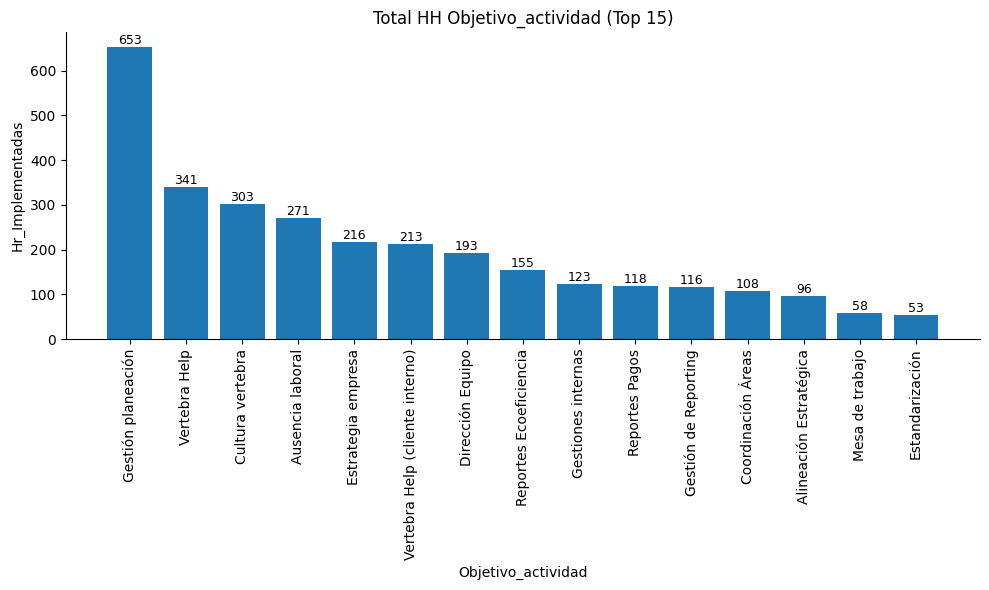

In [17]:
# Visualización con matplotlib
plt.figure(figsize=(10, 6))

# Seleccionar y mostrar el top 10
top_10 = data_processed.nlargest(15, 'Hr_Implementadas')

# Crear el gráfico de barras
bars = plt.bar(top_10['Objetivo_actividad'], top_10['Hr_Implementadas'])

# Agregar etiquetas de datos a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=9)

plt.xlabel('Objetivo_actividad')
plt.ylabel('Hr_Implementadas')
plt.title('Total HH Objetivo_actividad (Top 15)')
plt.xticks(rotation=90, ha='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend().set_visible(False)
plt.tight_layout()  # Ajustar el diseño
plt.show()

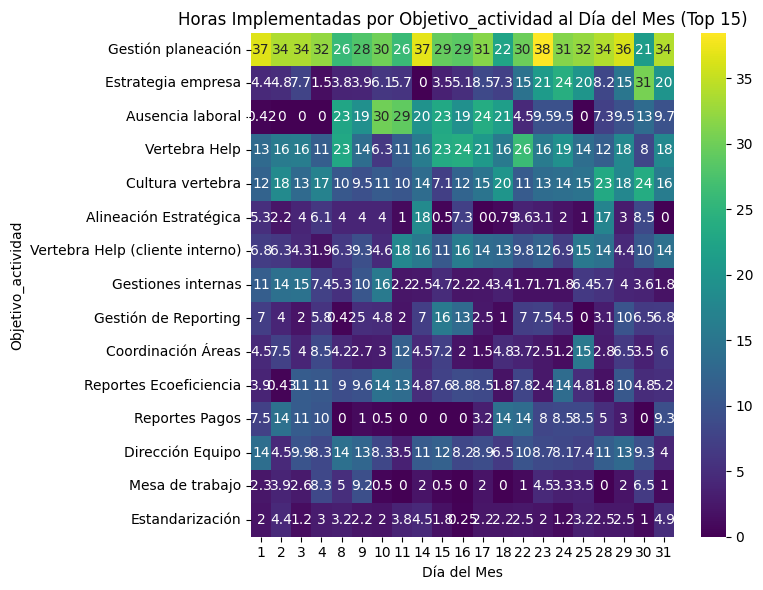

In [18]:
# Asegurarnos de que la columna "Fecha" sea de tipo datetime
data_informe['Fecha'] = pd.to_datetime(data_informe['Fecha'])

# Preprocesamiento de los datos para resumir las horas implementadas
data_resumen = data_informe.groupby(['Objetivo_actividad', 'Fecha'])['Hr_Implementadas'].sum().reset_index()

# Obtener el día del mes a partir de la columna 'Fecha'
data_resumen['Dia del Mes'] = data_resumen['Fecha'].dt.day

# Calcular el total de Hr_Implementadas
total_hr_Objetivo_actividad = data_resumen.groupby('Objetivo_actividad')['Hr_Implementadas'].sum()

# Tomar los 15 primeros
Objetivo_actividad_top_10 = total_hr_Objetivo_actividad.sort_values(ascending=False).index[:15]

# Filtrar los datos para los 15 primeros
data_resumen_top_10 = data_resumen[data_resumen['Objetivo_actividad'].isin(Objetivo_actividad_top_10)]

# Ordenar de mayor a menor por total de Hr_Implementadas
data_resumen_top_10 = data_resumen_top_10[data_resumen_top_10['Objetivo_actividad'].isin(Objetivo_actividad_top_10)].sort_values(by='Hr_Implementadas', ascending=False)

# Crear el mapa de calor con seaborn
plt.figure(figsize=(8, 6))

# Pivotear los datos para tener los días del mes en el eje x y Actividad_general en el eje y
heatmap_data = data_resumen_top_10.pivot(index='Objetivo_actividad', columns='Dia del Mes', values='Hr_Implementadas')

sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # Mostrar valores y formato de cadena
plt.xlabel('Día del Mes')
plt.ylabel('Objetivo_actividad')
plt.title('Horas Implementadas por Objetivo_actividad al Día del Mes (Top 15)')
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar el diseño
plt.show()

## Actividad especifica

In [19]:
# Realizar las operaciones de manipulación de datos
data_processed = data_informe.groupby('Actividad_especifica')['Hr_Implementadas'].sum().reset_index()
data_processed['Hr_Implementadas'] = data_processed['Hr_Implementadas'].round()
data_processed = data_processed.sort_values(by='Hr_Implementadas', ascending=False)
data_processed['Porcentaje'] = ((data_processed['Hr_Implementadas'] / data_processed['Hr_Implementadas'].sum()) * 100).round(2)
data_processed['Porcentaje_Acumulado'] = data_processed['Porcentaje'].cumsum()

# Filtrar las filas con Hr_Implementadas != 0
data_processed = data_processed[data_processed['Hr_Implementadas'] != 0]

data_processed

,Actividad_especifica,Hr_Implementadas,Porcentaje,Porcentaje_Acumulado
162,Gestión facturas,512.0,16.36,16.36
160,Gestión de tickets,381.0,12.17,28.53
333,Vacaciones,190.0,6.07,34.60
272,Retos del Mes,181.0,5.78,40.38
304,Seguimiento área tickets,167.0,5.34,45.72
...,...,...,...,...
148,Gestión Línea Base,1.0,0.03,99.86
244,Presupuesto,1.0,0.03,99.89
163,Gestión información colaboradores,1.0,0.03,99.92
327,Tiempo Muerto,1.0,0.03,99.95


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


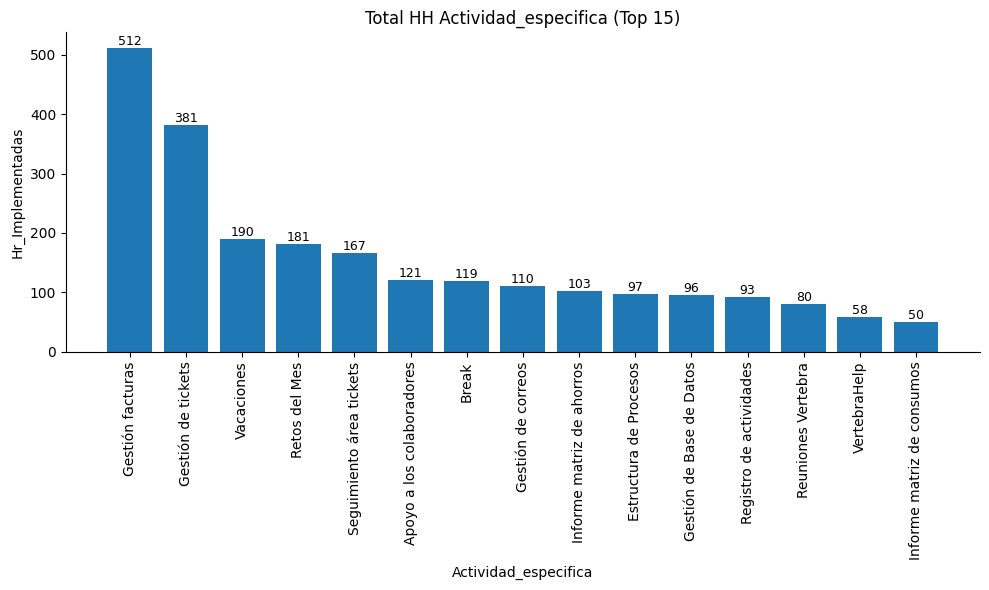

In [20]:
# Visualización con matplotlib
plt.figure(figsize=(10, 6))

# Seleccionar y mostrar el top 10
top_10 = data_processed.nlargest(15, 'Hr_Implementadas')

# Crear el gráfico de barras
bars = plt.bar(top_10['Actividad_especifica'], top_10['Hr_Implementadas'])

# Agregar etiquetas de datos a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=9)

plt.xlabel('Actividad_especifica')
plt.ylabel('Hr_Implementadas')
plt.title('Total HH Actividad_especifica (Top 15)')
plt.xticks(rotation=90, ha='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend().set_visible(False)
plt.tight_layout()  # Ajustar el diseño
plt.show()

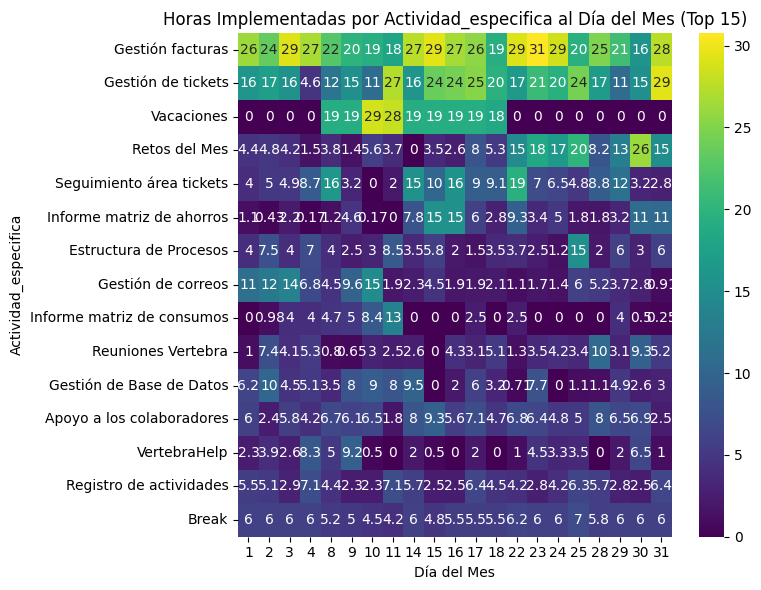

In [21]:
# Asegurarnos de que la columna "Fecha" sea de tipo datetime
data_informe['Fecha'] = pd.to_datetime(data_informe['Fecha'])

# Preprocesamiento de los datos para resumir las horas implementadas
data_resumen = data_informe.groupby(['Actividad_especifica', 'Fecha'])['Hr_Implementadas'].sum().reset_index()

# Obtener el día del mes a partir de la columna 'Fecha'
data_resumen['Dia del Mes'] = data_resumen['Fecha'].dt.day

# Calcular el total de Hr_Implementadas
total_hr_Objetivo_actividad = data_resumen.groupby('Actividad_especifica')['Hr_Implementadas'].sum()

# Tomar los 15 primeros
Actividad_especifica_top_10 = total_hr_Objetivo_actividad.sort_values(ascending=False).index[:15]

# Filtrar los datos para los 15 primeros
data_resumen_top_10 = data_resumen[data_resumen['Actividad_especifica'].isin(Actividad_especifica_top_10)]

# Ordenar de mayor a menor por total de Hr_Implementadas
data_resumen_top_10 = data_resumen_top_10[data_resumen_top_10['Actividad_especifica'].isin(Actividad_especifica_top_10)].sort_values(by='Hr_Implementadas', ascending=False)

# Crear el mapa de calor con seaborn
plt.figure(figsize=(8, 6))

# Pivotear los datos para tener los días del mes en el eje x y Actividad_general en el eje y
heatmap_data = data_resumen_top_10.pivot(index='Actividad_especifica', columns='Dia del Mes', values='Hr_Implementadas')

sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # Mostrar valores y formato de cadena
plt.xlabel('Día del Mes')
plt.ylabel('Actividad_especifica')
plt.title('Horas Implementadas por Actividad_especifica al Día del Mes (Top 15)')
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar el diseño
plt.show()

## Relación entre variables
En este apartado se analiza como interactuan los tipos de actividad y adicional los roles con las actividades especificas.

### Relacion actividades
Se muestra la relacion entre Actividad_general, Objetivo_actividad y Actividad_especifica, en este caso solo para el top 15 de actividades especificas.

In [22]:
# Obtener las 30 actividades específicas con más Hr_Implementadas
top_actividades = data_informe.groupby('Actividad_especifica')['Hr_Implementadas'].sum().nlargest(30).index

# Filtrar los datos para incluir solo las actividades específicas del top
data_redes = data_informe[data_informe['Actividad_especifica'].isin(top_actividades)]

# Crear un conjunto de nodos únicos de actividades y objetivos
nodos_actividades = set(data_redes['Actividad_general']) | set(data_redes['Objetivo_actividad']) | set(data_redes['Actividad_especifica'])

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar los nodos al grafo
G.add_nodes_from(nodos_actividades)

# Crear los enlaces entre actividades y objetivos
enlaces = list(zip(data_redes['Actividad_general'], data_redes['Objetivo_actividad'])) + \
          list(zip(data_redes['Objetivo_actividad'], data_redes['Actividad_especifica']))

# Agregar los enlaces al grafo
G.add_edges_from(enlaces)

# Crear el objeto de la red con pyvis
red_actividades = Network(directed=True, notebook=True)
red_actividades.from_nx(G)

# Guardar el diagrama de redes en un archivo HTML
red_actividades.save_graph("_build/html/red_actividades_CCYO.html")

<iframe src="red_actividades_CCYO.html" width="800" height="600"></iframe>

### Relación por proceso
Aqui se muestra como se relacionan los procesos con las actividades y con los contratos.

In [23]:
# Obtener las 15 actividades específicas con más Hr_Implementadas
top_actividades = data_informe.groupby('Actividad_especifica')['Hr_Implementadas'].sum().nlargest(15).index

# Filtrar los datos para incluir solo las actividades específicas del top
data_filtrado = data_informe[data_informe['Actividad_especifica'].isin(top_actividades)]

# Agregar los totales por rol y actividad
data_filtrado = data_filtrado.groupby(['Rol', 'Actividad_especifica'])['Hr_Implementadas'].sum().reset_index()

# Eliminar filas con valores cero en 'Hr_Implementadas'
data_filtrado = data_filtrado[data_filtrado['Hr_Implementadas'] != 0]

# Crear un conjunto de nodos únicos
nodos = pd.DataFrame({'name': data_filtrado['Rol'].unique().tolist() + data_filtrado['Actividad_especifica'].unique().tolist()})

# Agregar índices numéricos para los nodos
nodos['nodeID'] = range(len(nodos))

# Crear el data frame de enlaces
enlaces = data_filtrado.merge(nodos, left_on='Rol', right_on='name', how='inner')\
                        .merge(nodos, left_on='Actividad_especifica', right_on='name', how='inner')\
                        .rename(columns={'nodeID_x': 'RolID', 'nodeID_y': 'ActividadID'})

# Crear el gráfico de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=nodos['name']
    ),
    link=dict(
      source=enlaces['RolID'],
      target=enlaces['ActividadID'],
      value=enlaces['Hr_Implementadas']
  )
))

fig.update_layout(title_text="Gráfico de Sankey de Actividades",
                  font=dict(size=12))

# Guardar el gráfico como archivo HTML
html_path = '_build/html/sankey_CCYO.html'
fig.write_html(html_path)

#fig.show()

<iframe src="sankey_CCYO.html" width="800" height="600"></iframe>

In [24]:
# Obtener las 15 actividades específicas con más Hr_Implementadas
top_actividades = data_informe.groupby('Contrato')['Hr_Implementadas'].sum().nlargest(15).index

# Filtrar los datos para incluir solo las actividades específicas del top
data_filtrado = data_informe[data_informe['Contrato'].isin(top_actividades)]

# Agregar los totales por rol y actividad
data_filtrado = data_filtrado.groupby(['Rol', 'Contrato'])['Hr_Implementadas'].sum().reset_index()

# Eliminar filas con valores cero en 'Hr_Implementadas'
data_filtrado = data_filtrado[data_filtrado['Hr_Implementadas'] != 0]

# Crear un conjunto de nodos únicos
nodos = pd.DataFrame({'name': data_filtrado['Rol'].unique().tolist() + data_filtrado['Contrato'].unique().tolist()})

# Agregar índices numéricos para los nodos
nodos['nodeID'] = range(len(nodos))

# Crear el data frame de enlaces
enlaces = data_filtrado.merge(nodos, left_on='Rol', right_on='name', how='inner')\
                        .merge(nodos, left_on='Contrato', right_on='name', how='inner')\
                        .rename(columns={'nodeID_x': 'RolID', 'nodeID_y': 'ContratoID'})

# Crear el gráfico de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=nodos['name']
    ),
    link=dict(
      source=enlaces['RolID'],
      target=enlaces['ContratoID'],
      value=enlaces['Hr_Implementadas']
  )
))

fig.update_layout(title_text="Gráfico de Sankey de Contratos",
                  font=dict(size=12))

# Guardar el gráfico como archivo HTML
html_path = '_build/html/sankey_CCYO_Contrato.html'
fig.write_html(html_path)

#fig.show()

<iframe src="sankey_CCYO_Contrato.html" width="800" height="600"></iframe>